## Discribtion:- 
Fraudulent transactions are rare compared to the norm. As such, learn to properly classify imbalanced datasets.

# Content :-

IT is important that are able to recognize fraudulent transaction so  that customer are not changed for items that they did not purchase .

## Problem Statement
The course provides technical and theoretical insights and demonstrates how to implement fraud detection models. Finally, get tips and advice from real-life experience to help prevent common mistakes in fraud analytics.

## Here we will exprementing 3 algorithms

 1. Decision Tree Classifier
 2. Random Forest Classifier
 3. XGB Classifier

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

import pickle

In [3]:
df=pd.read_csv('train_data.csv')

In [4]:
df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [5]:
df.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [6]:
df.shape

(76529, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [8]:
df.apply(lambda x:x.nunique())

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [9]:
df['is_fraud'].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [10]:
for i in df.columns:
    print(i)
    print('\n')
    print(df[i].unique())
    print('\n')

transaction_number


[    144703125000   77406814453032  308929485482801 ...  119750257089000
 1949798765017089 1051344513778987]


user_id


[17539344 24710841 24265476 ...  9253764   422500 27952369]


payment_method


['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']


partner_id


[ 47334  78890 102557 118335  23667   7889  31556  86779 149891 165669
 110446 189336  55223  63112  15778 157780 213003 173558  39445 126224
  71001  94668 181447]


partner_category


['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']


country


['IND_INR']


device_type


['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']


money_transacted


[ -5.   100.    50.   ...  40.12  41.   494.  ]


transaction_initiation


['2016-11-15 19:16:12+00:00' '2017-01-11 09:25:33+00:00'
 '2016-12-07 07:58:09+00:00' ... '2016-12-26 21:47:08+00:00'
 '2016-12-11 13:44:06+00:00' '2017-01-1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [12]:
df['transaction_initiation']=pd.to_datetime(df['transaction_initiation'])

In [13]:
df['Month'] = pd.DatetimeIndex(df['transaction_initiation']).month
df['Day']=pd.DatetimeIndex(df['transaction_initiation']).day
df['Year']=pd.DatetimeIndex(df['transaction_initiation']).year
df['Hour']=pd.DatetimeIndex(df['transaction_initiation']).hour
df['Dayofweek']=pd.DatetimeIndex(df['transaction_initiation']).dayofweek


In [14]:
df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Month,Day,Year,Hour,Dayofweek
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,11,15,2016,19,1
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,1,11,2017,9,2
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,12,7,2016,7,2
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,1,11,2017,16,2
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,11,16,2016,17,2


In [16]:
df.drop(['transaction_number','user_id','country','transaction_initiation'],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_method            76529 non-null  object 
 1   partner_id                76529 non-null  int64  
 2   partner_category          76529 non-null  object 
 3   device_type               76529 non-null  object 
 4   money_transacted          76529 non-null  float64
 5   partner_pricing_category  76529 non-null  int64  
 6   is_fraud                  76529 non-null  int64  
 7   Month                     76529 non-null  int64  
 8   Day                       76529 non-null  int64  
 9   Year                      76529 non-null  int64  
 10  Hour                      76529 non-null  int64  
 11  Dayofweek                 76529 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 7.0+ MB


In [18]:
df.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'is_fraud', 'Month',
       'Day', 'Year', 'Hour', 'Dayofweek'],
      dtype='object')

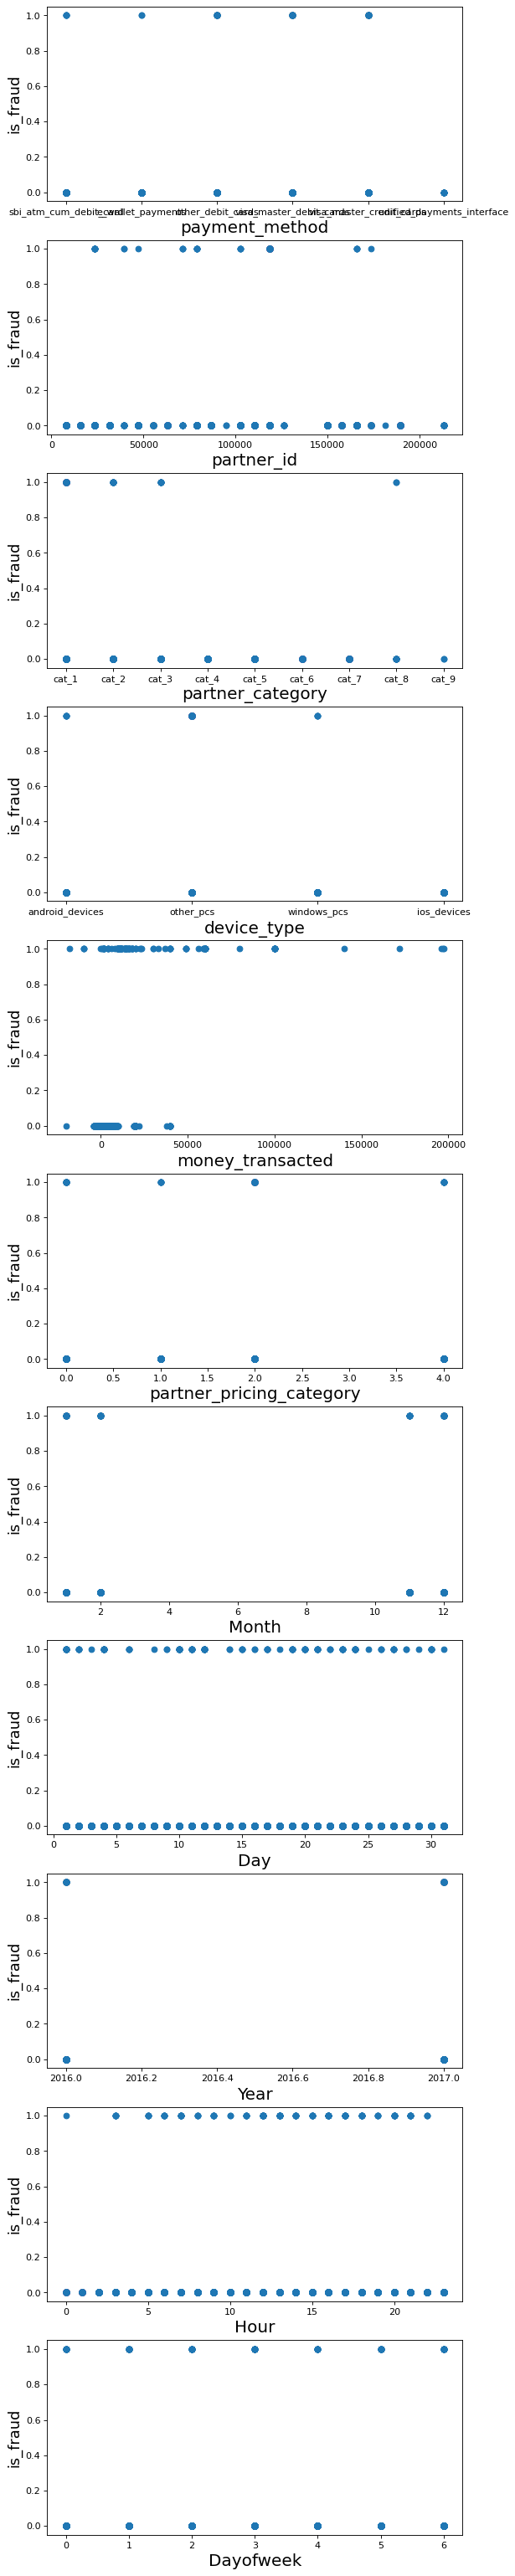

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(8, 50), dpi=80)

plt.subplot(11,1,1)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('payment_method', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['payment_method'],df['is_fraud']) 

plt.subplot(11,1,2)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('partner_id', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['partner_id'],df['is_fraud']) 

plt.subplot(11,1,3)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('partner_category', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['partner_category'],df['is_fraud']) 

plt.subplot(11,1,4)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('device_type', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['device_type'],df['is_fraud']) 

plt.subplot(11,1,5)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('money_transacted', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['money_transacted'],df['is_fraud']) 

plt.subplot(11,1,6)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('partner_pricing_category', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['partner_pricing_category'],df['is_fraud']) 

plt.subplot(11,1,7)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['Month'],df['is_fraud']) 

plt.subplot(11,1,8)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['Day'],df['is_fraud']) 

plt.subplot(11,1,9)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['Year'],df['is_fraud']) 

plt.subplot(11,1,10)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Hour', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['Hour'],df['is_fraud']) 

plt.subplot(11,1,11)
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Dayofweek', fontsize=18)
plt.ylabel('is_fraud', fontsize=16)
plt.scatter(df['Dayofweek'],df['is_fraud']) 

In [20]:
my_list=df.select_dtypes(include=['int64','object']).columns
df[my_list]=df[my_list].astype('category')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_method            76529 non-null  category
 1   partner_id                76529 non-null  category
 2   partner_category          76529 non-null  category
 3   device_type               76529 non-null  category
 4   money_transacted          76529 non-null  float64 
 5   partner_pricing_category  76529 non-null  category
 6   is_fraud                  76529 non-null  category
 7   Month                     76529 non-null  category
 8   Day                       76529 non-null  category
 9   Year                      76529 non-null  category
 10  Hour                      76529 non-null  category
 11  Dayofweek                 76529 non-null  category
dtypes: category(11), float64(1)
memory usage: 1.4 MB


In [22]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [24]:
num_cols = X_train.select_dtypes(exclude='category').columns
print(len(num_cols))

cat_cols=X_train.select_dtypes(include='category').columns
print(len(cat_cols))

1
10


In [25]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [26]:
ohe = OneHotEncoder(drop='first',handle_unknown='error')

ohe.fit(X_train[cat_cols])

columns_ohe = list(ohe.get_feature_names(cat_cols))

print(columns_ohe)

['payment_method_other_debit_cards', 'payment_method_sbi_atm_cum_debit_card', 'payment_method_unified_payments_interface', 'payment_method_visa_master_credit_cards', 'payment_method_visa_master_debit_cards', 'partner_id_15778', 'partner_id_23667', 'partner_id_31556', 'partner_id_39445', 'partner_id_47334', 'partner_id_55223', 'partner_id_63112', 'partner_id_71001', 'partner_id_78890', 'partner_id_86779', 'partner_id_94668', 'partner_id_102557', 'partner_id_110446', 'partner_id_118335', 'partner_id_126224', 'partner_id_149891', 'partner_id_157780', 'partner_id_165669', 'partner_id_173558', 'partner_id_181447', 'partner_id_189336', 'partner_id_213003', 'partner_category_cat_2', 'partner_category_cat_3', 'partner_category_cat_4', 'partner_category_cat_5', 'partner_category_cat_6', 'partner_category_cat_7', 'partner_category_cat_8', 'partner_category_cat_9', 'device_type_ios_devices', 'device_type_other_pcs', 'device_type_windows_pcs', 'partner_pricing_category_1', 'partner_pricing_categor

In [27]:
X_train_cat = ohe.transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

In [28]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [29]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [30]:
X_train.shape

(51274, 105)

In [31]:
X_train.head()

,money_transacted,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_id_15778,partner_id_23667,partner_id_31556,partner_id_39445,partner_id_47334,partner_id_55223,partner_id_63112,partner_id_71001,partner_id_78890,partner_id_86779,partner_id_94668,partner_id_102557,partner_id_110446,partner_id_118335,partner_id_126224,partner_id_149891,partner_id_157780,partner_id_165669,partner_id_173558,partner_id_181447,partner_id_189336,partner_id_213003,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,partner_pricing_category_1,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2017,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6
0,-0.066664,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.315968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.057391,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.059332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.029089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)


In [33]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [34]:
#DECISION TREE

clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
# print(classification_report(y_test,y_pred_test,digits=4))

Train Accuracy: 0.9996489448843469
Test Accuracy: 0.9996436349237775


In [35]:
print(confusion_matrix(y_test, y_pred_test))


[[25202     2]
 [    7    44]]


In [36]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTrees",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.999649,0.999649,0.999649,0.999632,0.999644,0.999644,0.999635,0.999634


In [37]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=X_train, y=y_train)

y_pred_train = clf_rf.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9989705008909127


In [38]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     51171
           1     1.0000    1.0000    1.0000       103

    accuracy                         1.0000     51274
   macro avg     1.0000    1.0000    1.0000     51274
weighted avg     1.0000    1.0000    1.0000     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9992    0.9998    0.9995     25204
           1     0.8571    0.5882    0.6977        51

    accuracy                         0.9990     25255
   macro avg     0.9282    0.7940    0.8486     25255
weighted avg     0.9989    0.9990    0.9989     25255



In [40]:
print(confusion_matrix(y_test, y_pred_test))

[[25199     5]
 [   21    30]]


In [41]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.999649,0.999649,0.999649,0.999632,0.999644,0.999644,0.999635,0.999634
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.998971,0.998971,0.998881,0.998875


In [42]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
XGB_model.fit(X_train, y_train)
y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

In [43]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9997659632562312
Test Accuracy: 0.9994852504454563


In [44]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9999     51171
           1     0.9691    0.9126    0.9400       103

    accuracy                         0.9998     51274
   macro avg     0.9844    0.9563    0.9699     51274
weighted avg     0.9998    0.9998    0.9998     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     25204
           1     0.8800    0.8627    0.8713        51

    accuracy                         0.9995     25255
   macro avg     0.9399    0.9313    0.9355     25255
weighted avg     0.9995    0.9995    0.9995     25255



In [45]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.999649,0.999649,0.999649,0.999632,0.999644,0.999644,0.999635,0.999634
1,RandomForest,1.000000,1.000000,1.000000,1.000000,0.998971,0.998971,0.998881,0.998875
2,XGBoost,0.999766,0.999766,0.999762,0.999762,0.999485,0.999485,0.999481,0.999483


In [46]:
importances = XGB_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 52  62  61  60  59  58  57  56  55  53  93  51  50  49  48  47  46  45
  63  43  64  92  89  85  82  81  80  79  78  77  76  74  73  72  71  70
  69  68  91  65  94  44  88  20   2  18  17  16  15  97  21  13  11  10
   9   8   7   6  98  12 101  22  24  39  36  35  34  23  32  31  33 102
  29  96  27  26  25  30   3  87  38  95  90  40  83  54  84  41  19 104
  28  37  86   1 103  75  66  14   5  42 100  99   4  67   0]


In [47]:
%matplotlib inline
features = X_train.columns
plt.figure(figsize=(144,144))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 50)
plt.xlabel('Relative Importance')

plt.show()

In [59]:
## TEST

In [49]:
df1=pd.read_csv('test_data.csv')
df1['transaction_initiation']=pd.to_datetime(df1['transaction_initiation'])
df1['Month'] = pd.DatetimeIndex(df1['transaction_initiation']).month
df1['Day']=pd.DatetimeIndex(df1['transaction_initiation']).day
df1['Year']=pd.DatetimeIndex(df1['transaction_initiation']).year
df1['Hour']=pd.DatetimeIndex(df1['transaction_initiation']).hour
df1['Dayofweek']=pd.DatetimeIndex(df1['transaction_initiation']).dayofweek
df1.drop(['transaction_number','user_id','country','transaction_initiation'],axis=1,inplace=True)
my_list=df1.select_dtypes(include=['int64','object']).columns
df1[my_list]=df1[my_list].astype('category')
df1_num = pd.DataFrame(scaler.transform(df1[num_cols]), columns=num_cols)
df1_cat = ohe.transform(df1[cat_cols])
df1_cat = pd.DataFrame(df1_cat.todense(), columns=columns_ohe)
df2 = pd.concat([df1_num, df1_cat], axis=1)


In [50]:
filename = 'finalized_model.sav'
pickle.dump(XGB_model, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))

In [78]:
final_prediction = loaded_model.predict(df2)

In [53]:
df3=pd.DataFrame(loaded_model.predict(df2),columns=['is_fraud'])


In [54]:
df1=pd.read_csv('test_data.csv')

In [55]:
df4=pd.concat([df1,df3],axis=1)

In [56]:
df4.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,0
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,0
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,0
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,0
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,0


In [57]:
df4[['transaction_number','is_fraud']].to_csv('final_submission.csv',index=False)

In [58]:
df.isna().sum()

payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
is_fraud                    0
Month                       0
Day                         0
Year                        0
Hour                        0
Dayofweek                   0
dtype: int64

In [61]:
df4['is_fraud'].value_counts()

0    19099
1       34
Name: is_fraud, dtype: int64

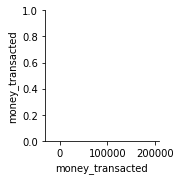

In [64]:
sns.pairplot(df)

In [66]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)

In [69]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [71]:
num_cols = X_train.select_dtypes(exclude='category').columns
print(len(num_cols))

cat_cols=X_train.select_dtypes(include='category').columns
print(len(cat_cols))

1
10


In [72]:
ss_file = pd.read_csv('sample_submission.csv')

In [73]:
print(ss_file.shape)
print(ss_file.columns)

(19133, 2)
Index(['transaction_number', 'is_fraud'], dtype='object')


In [74]:
# check is fraud value_counts
ss_file["is_fraud"].value_counts()

0    19133
Name: is_fraud, dtype: int64

In [79]:
ss_file['is_fraud'] = final_prediction

In [81]:
print(ss_file.shape)
print(ss_file.columns)

(19133, 2)
Index(['transaction_number', 'is_fraud'], dtype='object')
